# Проект: Анализ бизнес-показателей
**Описание проекта**


Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импорт библиотек

import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# загрузка данных

paths1 = ['/datasets/visits_info_short.csv', '/datasets/orders_info_short.csv', '/datasets/costs_info_short.csv']
paths2 = ['visits_info_short.csv', 'orders_info_short.csv', 'costs_info_short.csv']
dfs = []

for i in range(len(paths1)):
    if os.path.exists(paths1[i]):
        dfs.append(pd.read_csv(paths1[i]))
    elif os.path.exists(paths2[i]):
        dfs.append(pd.read_csv(paths2[i]))
    else:
        print('File is missing')
        
visits = dfs[0]
orders = dfs[1]
costs = dfs[2]

In [3]:
# загрузка первых строк и общей информации о датафреймах

for i in range(len(dfs)):
    print(paths1[i])
    print()
    print(dfs[i].head(5))
    print()
    print(dfs[i].info())
    print()

/datasets/visits_info_short.csv

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4 

Таблица `visits`: 309901 строка, 6 столбцов, пропуски данных отсутствуют.

Таблица `orders`: 40212 строк, 3 столбца, пропуски данных отсутствуют.

Таблица `costs`: 1800 строк, 3 столбца, пропуски данных отсутствуют.

Во всех таблицах необходимо:
- провести проверку наличия явных дубликатов
- переименовать столбцы (верхний регистр заменить на нижний, пробелы заменить на знак нижнего подчеркивания)
- преобразовать тип данных в столбцах с данными о времени

In [4]:
# проверка наличия явных дубликатов

for df in dfs:
    print(df.duplicated().sum())

0
0
0


Явных дубликатов в таблицах нет.

In [5]:
# переименование столбцов датафреймов

for df in dfs:
    df.columns = [df.columns[i].lower() for i in range(len(df.columns))]
    df.columns = [df.columns[i].replace(' ', '_') for i in range(len(df.columns))]

In [6]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

visits['month'] = visits['session_start'].dt.month
visits['week'] = visits['session_start'].dt.isocalendar().week
visits['session_duration'] = (visits['session_end'] - visits['session_start']).dt.seconds

Для дальнейшего анализа расходов на рекламу и привлечения клиентов в таблицы `costs` и `visits` добавлены дополнительные столбцы `month` и `week`. Также в таблицу `visits` добавлена продолжительность сессии.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функции для вычисления значений метрик:

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
                'month': 'first',
                'week': 'first'
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
        
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков:

In [8]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1, colormap='gist_rainbow'
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2, colormap='gist_rainbow'
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, colormap='gist_rainbow')
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4, colormap='gist_rainbow')
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()
    

# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1, colormap='gist_rainbow')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, colormap='gist_rainbow')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    
    
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1, colormap='gist_rainbow')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, colormap='gist_rainbow')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, colormap='gist_rainbow')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4, colormap='gist_rainbow')
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5, colormap='gist_rainbow')
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

In [9]:
# создаем таблицу profiles с профилями пользователей с помощью функции get_profiles

profiles = get_profiles(visits, orders, costs)

In [10]:
profiles.head()

user_id            first_ts     channel  device         region  month  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States      5   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States      7   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France     10   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany      8   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States     10   

   week          dt  payer  acquisition_cost  
0    19  2019-05-07   True          1.088172  
1    28  2019-07-09  False          1.107237  
2    40  2019-10-01  False          0.000000  
3    34  2019-08-22  False          0.988235  
4    40  2019-10-02  False          0.230769

In [11]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   month             150008 non-null  int64         
 6   week              150008 non-null  UInt32        
 7   dt                150008 non-null  object        
 8   payer             150008 non-null  bool          
 9   acquisition_cost  150008 non-null  float64       
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 11.2+ MB


Таблица `profiles` содержит данные о 150008 уникальных пользователях. Найдем минимальную и максимальную даты привлечения пользователей:

In [12]:
print('Минимальная дата привлечения пользователей: ', profiles['first_ts'].dt.date.min())
print('Максимальная дата привлечения пользователей: ', profiles['first_ts'].dt.date.max())

Минимальная дата привлечения пользователей:  2019-05-01
Максимальная дата привлечения пользователей:  2019-10-27


Даты привлечения совпадают с датами, указанными в условии.

#### Анализ количества пользователй и доли платящих  в разбивке по странам

In [13]:
# сортировка по количеству пользователей
print(profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='user_id', ascending=False))
print()

# сортировка по доле платящих пользователей
print(profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False))

               user_id     payer
region                          
United States   100002  0.069019
UK               17575  0.039829
France           17450  0.037994
Germany          14981  0.041119

               user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994


Две трети пользователей приложения проживают в США. Из этой же страны приходят и больше всего платящих пользователей (6,9% от всех посетителей).

#### Анализ количества пользователй и доли платящих  в разбивке по устройствам

In [14]:
# сортировка по количеству пользователей
print(profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='user_id', ascending=False))
print()

# сортировка по доле платящих пользователей
print(profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False))

         user_id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644

         user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468


Мобильными устройствами пользуется больше пользователей, чем стационарными. При этом платящих пользователей больше среди пользователей техники Apple, чем других устройств.

#### Анализ количества пользователй и доли платящих  в разбивке по каналам привлечения

In [15]:
# сортировка по количеству пользователей
print(profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='user_id', ascending=False))
print()

# сортировка по доле платящих пользователей
print(profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False))

                    user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700

                    user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553


Здесь отметим следующее:
- больше всего привлеченных пользователей - органические. В этой же категории ниже всего доля платящих пользователей.
- выделяется канал FaceBoom, который привлекает и больше всего пользователей, и больше всего платящих пользователей по сравнению с другими платными каналами. Необходимо дополнительно расмотреть удержание пользователей, приходящих через этот канал, чтобы убедиться в его эффективности.
- канал TipTop, хотя и приводит достаточно много новых пользователей, находится всего лишь на четвертом месте по доле платящих клиентов. По этому показателю его обгоняют каналы AdNonSense и lambdaMediaAds, которые занимают последние места по общему количеству привлеченных пользователей. Необходимо рассмотреть дополнительные параметры по этому каналу.

Бросается в глаза большая разница в количестве привлеченных клиентов через разные каналы. Вероятно, такая большая разница связана с тем, в каком регионе действует тот или иной рекламный канал. Построим сводную таблицу с наименованиями каналов в качестве индексов, а в столбцах посчитаем количество уникальных пользователей из разных стран. Отсортируем таблицу по количеству пользователей из США (так как большинство пользователей приходят оттуда).

In [16]:
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique').fillna(0).sort_values(by='United States', ascending=False)

region              France  Germany      UK  United States
channel                                                   
organic             6392.0   5453.0  6421.0        38173.0
FaceBoom               0.0      0.0     0.0        29144.0
TipTop                 0.0      0.0     0.0        19561.0
RocketSuperAds         0.0      0.0     0.0         4448.0
MediaTornado           0.0      0.0     0.0         4364.0
YRabbit                0.0      0.0     0.0         4312.0
AdNonSense          1366.0   1219.0  1295.0            0.0
LeapBob             2988.0   2519.0  3046.0            0.0
OppleCreativeMedia  2991.0   2562.0  3052.0            0.0
WahooNetBanner      2971.0   2579.0  3003.0            0.0
lambdaMediaAds       742.0    649.0   758.0            0.0

По данной таблице видно, что рекламные каналы в США и странах Европы не пересекаются, поэтому имеет смысл оценивать их эффективность по отдельности. Американские каналы, требующие особого внимания, мы уже выделили, теперь рассмотрим европейские. Тройка лидеров по общему количеству привлеченных пользователей: LeapBob, OppleCreativeMedia, WahooNetBanner. Больше всего платящих пользователей из них приносит канал WahooNetBanner.

Таким образом, типичный пользователь приложения Procrastinate Pro+ - это владелей устройства Apple из США, который попал в приложение через рекламный канал FaceBoom.

### Маркетинг

#### Общая сумма расходов на маркетинг

In [17]:
print('Общая сумма расходов на маркетинг за рассматриваемый период составляет', round(costs['costs'].sum()), ' долларов.')

Общая сумма расходов на маркетинг за рассматриваемый период составляет 105497  долларов.


#### Распределение трат по источникам

In [18]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

На каналы, приносящие больше всего пользователей, была потрачена большая часть рекламного бюджета, причем почти 52% всего это бюджета потрачено на один канал - TipTop.

#### Визуализация динамики изменения расходов во времени

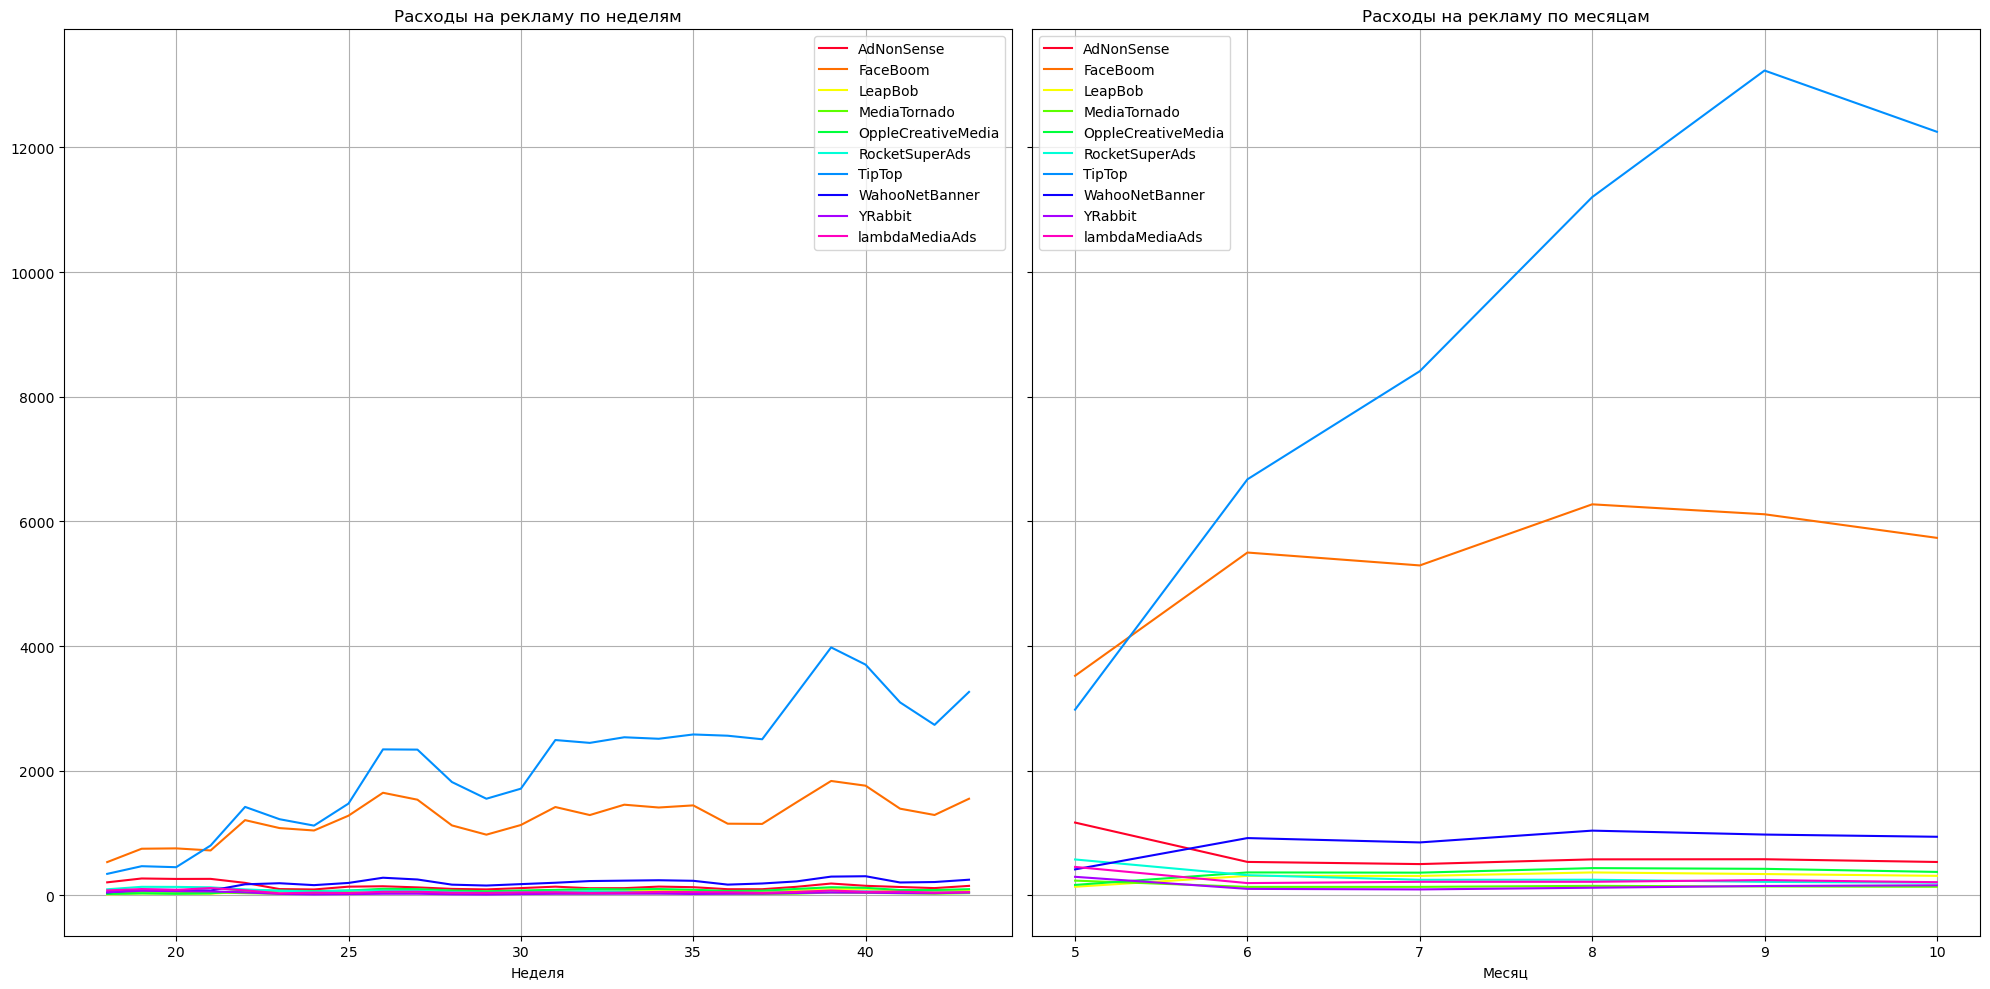

In [19]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax1,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Неделя')
plt.title('Расходы на рекламу по неделям')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax2,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Месяц')
plt.title('Расходы на рекламу по месяцам')

plt.tight_layout()
plt.show()

Графики подтверждают данные из таблицы: на каналы FaceBoom и TipTop действительно тратилось больше всего денег, причем в течение практически всего рассматриваемого периода недельные траты на каждый из этих каналов превышали месячные траты на другие каналы. Траты резко возросли примерно с середины мая, причем на канал TipTop в гораздо большей степени, чем на FaceBoom. Увеличение затрат происходило ежемесячно до октября.

Исключим данные по этим каналам и рассмотрим динамику расходов по остальным источникам.

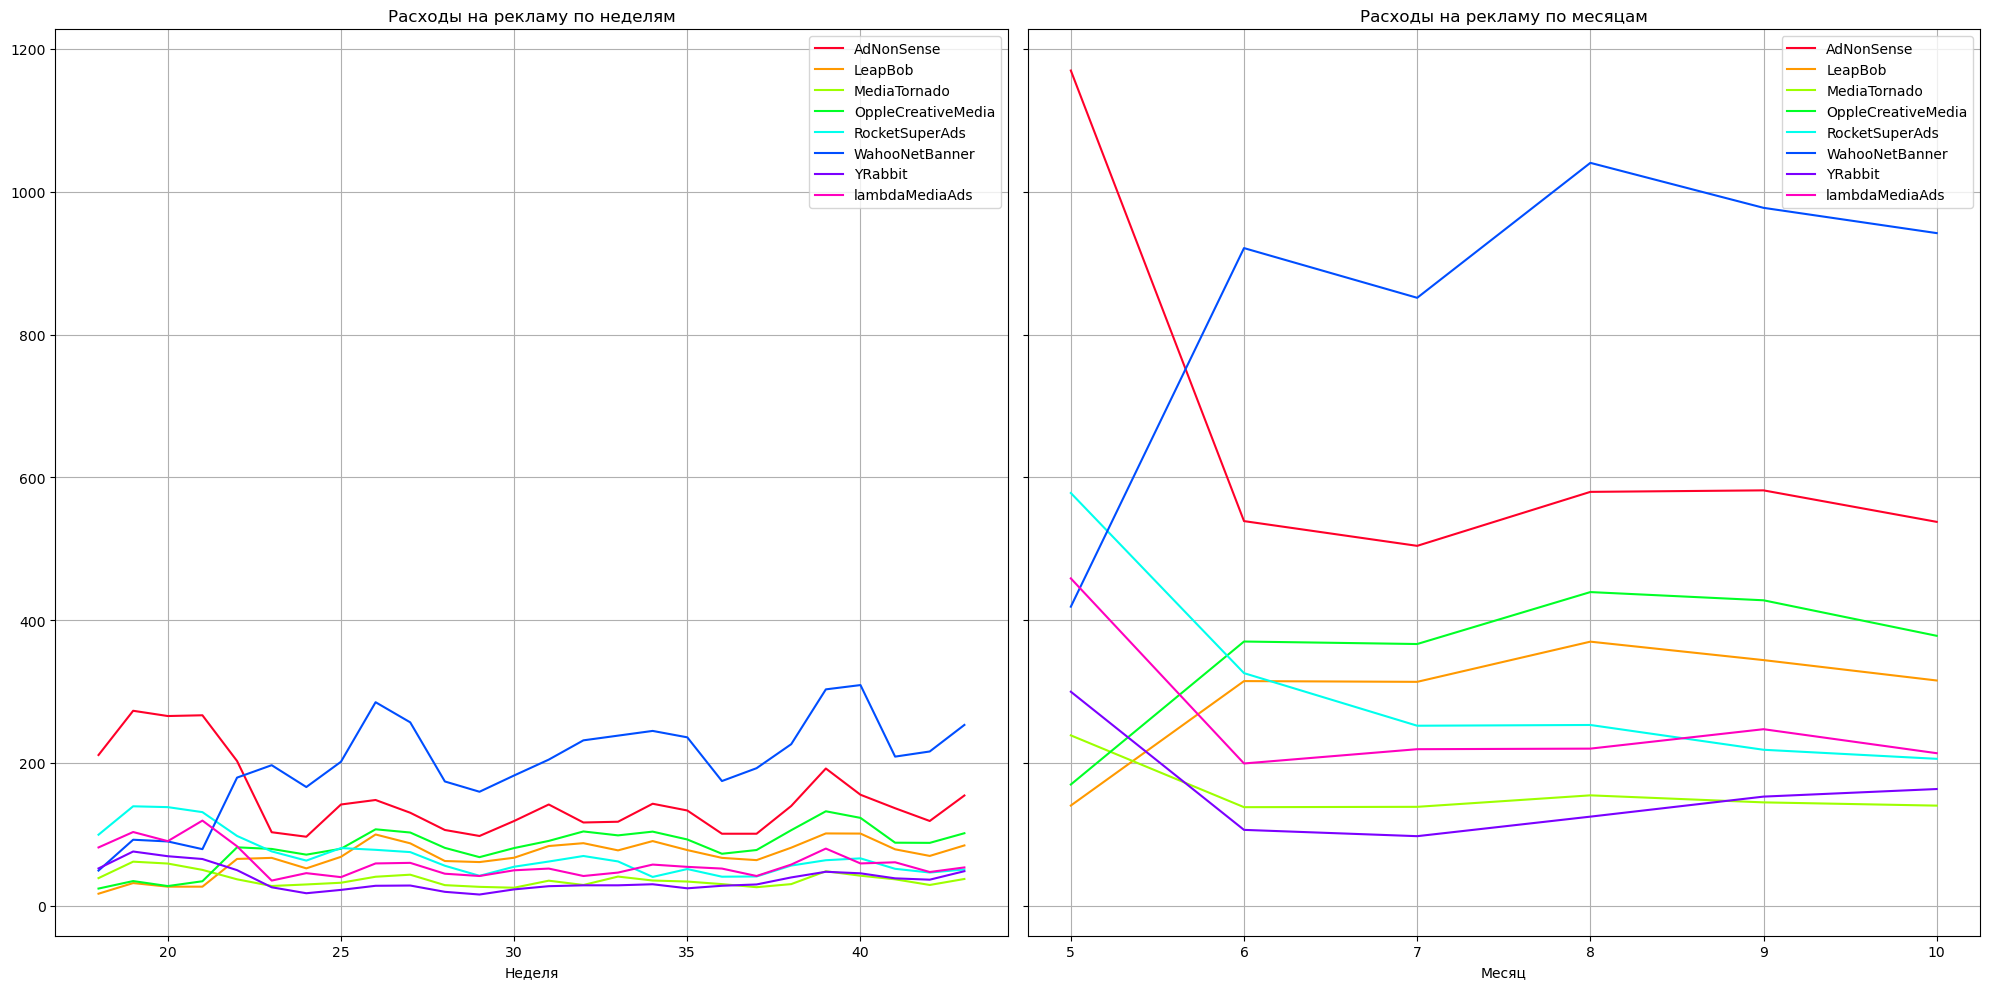

In [20]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
costs.query('channel != "FaceBoom" and channel != "TipTop"').pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax1,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Неделя')
plt.title('Расходы на рекламу по неделям')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.query('channel != "FaceBoom" and channel != "TipTop"').pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax2,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Месяц')
plt.title('Расходы на рекламу по месяцам')

plt.tight_layout()
plt.show()

В мае увеличились траты на следующие каналы:
- WahooNetBanner (Европа)
- OppleCreativeMedia (Европа)
- LeapBob (Европа)


Снизились траты на каналы:
- AdNonSense (Европа)
- lambdaMediaAds (Европа)
- RocketSuperAds (США)
- MediaTornado (США)
- YRabbit (США)

##### Визуализация динамики количества привлеченных пользователей

Насколько изменение трат на рекламу влияет на количество привлеченных пользователей? Постром подобные графики по таблице `profiles` и рассмотрим динамику количества привлеченных пользователей по неделям и месяцам.

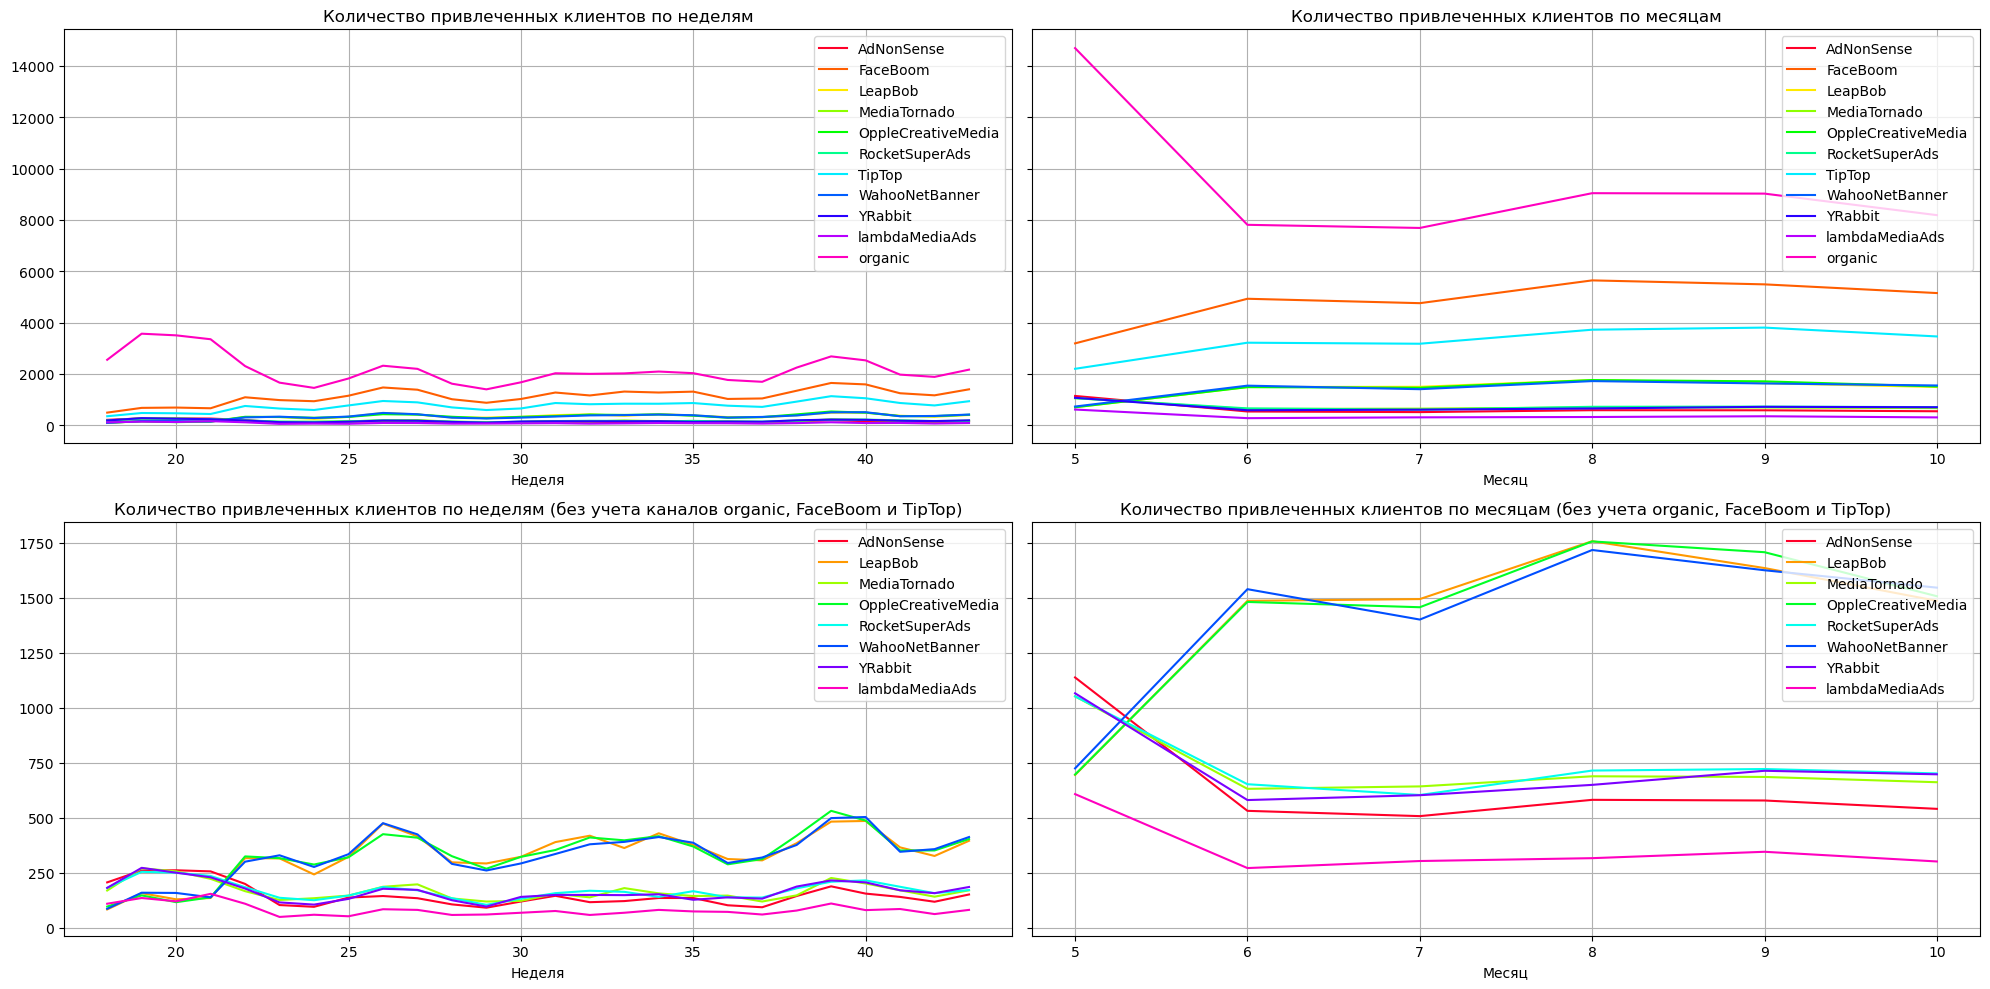

In [21]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2, 2, 1)
profiles.pivot_table(index='week', columns='channel', values='user_id', aggfunc='nunique').plot(grid=True, ax=ax1,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Неделя')
plt.title('Количество привлеченных клиентов по неделям')

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
profiles.pivot_table(index='month', columns='channel', values='user_id', aggfunc='nunique').plot(grid=True, ax=ax2,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Месяц')
plt.title('Количество привлеченных клиентов по месяцам')

ax3 = plt.subplot(2, 2, 3)
profiles.query('channel != "organic" and channel != "FaceBoom" and channel != "TipTop"').pivot_table(index='week', columns='channel', values='user_id', aggfunc='nunique').plot(grid=True, ax=ax3,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Неделя')
plt.title("Количество привлеченных клиентов по неделям (без учета каналов organic, FaceBoom и TipTop)")

ax4 = plt.subplot(2, 2, 4, sharey=ax3)
profiles.query('channel != "organic" and channel != "FaceBoom" and channel != "TipTop"').pivot_table(index='month', columns='channel', values='user_id', aggfunc='nunique').plot(grid=True, ax=ax4,colormap='gist_rainbow')
plt.legend()
plt.xlabel('Месяц')
plt.title("Количество привлеченных клиентов по месяцам (без учета organic, FaceBoom и TipTop)")

plt.tight_layout()
plt.show()

Наиболее ярко на графиках заметен сильный спад прироста органических пользователей в мае с последующим небольшим ростом, выравниванием и небольшим спадом в октябре. Начиная с 24 недели графики привлечения пользователей на всех рекламных каналах начинают повторять очертания графика привлечения органических пользователей. Что вызвало такой спад органических пользователей в мае - начало агрессивной рекламной кампании на крупных рекламных площадках, сезонность использования приложения или иное внешнее воздействие - по имеющимся данным точно определить невозможно. Можем только отметить тот факт, что те площадки, затраты на которые в мае были снижены, также демонстировали спад количества привлеченных пользователей в этот период. Те же площадки, затраты на которые увеличились, не допустили спада привлеченных пользователей. При этом отметим, что резкое увеличение трат на канал TipTop  не привело к такому же резкому увеличению количества пришедших через этот канал пользователей.

Посмотрим далее, во сколько компании обошлось привлечение пользователей.

#### Вычисление средней стоимости привлечения пользователей (CAC) из каждого источника

In [22]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac', ascending=False)

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

Канал TipTop не только самый дорогой в рамках общей суммы, но и стоимость привлечения одного пользователя через данный канал значительно превышает CAC из других источников. Конверсия же пользователей из данного источника не самая высокая, поэтому эффективность использования данного канала под вопросом.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [23]:
# задаем момент и горизонт анализа

observation_date = datetime(2019, 11, 1).date()
analysis_horizon = 14

# исключаем из анализа органических пользователей
profiles = profiles.query('channel != "organic"')

#### Графики LTV и ROI, динамики LTV, CAC и ROI.

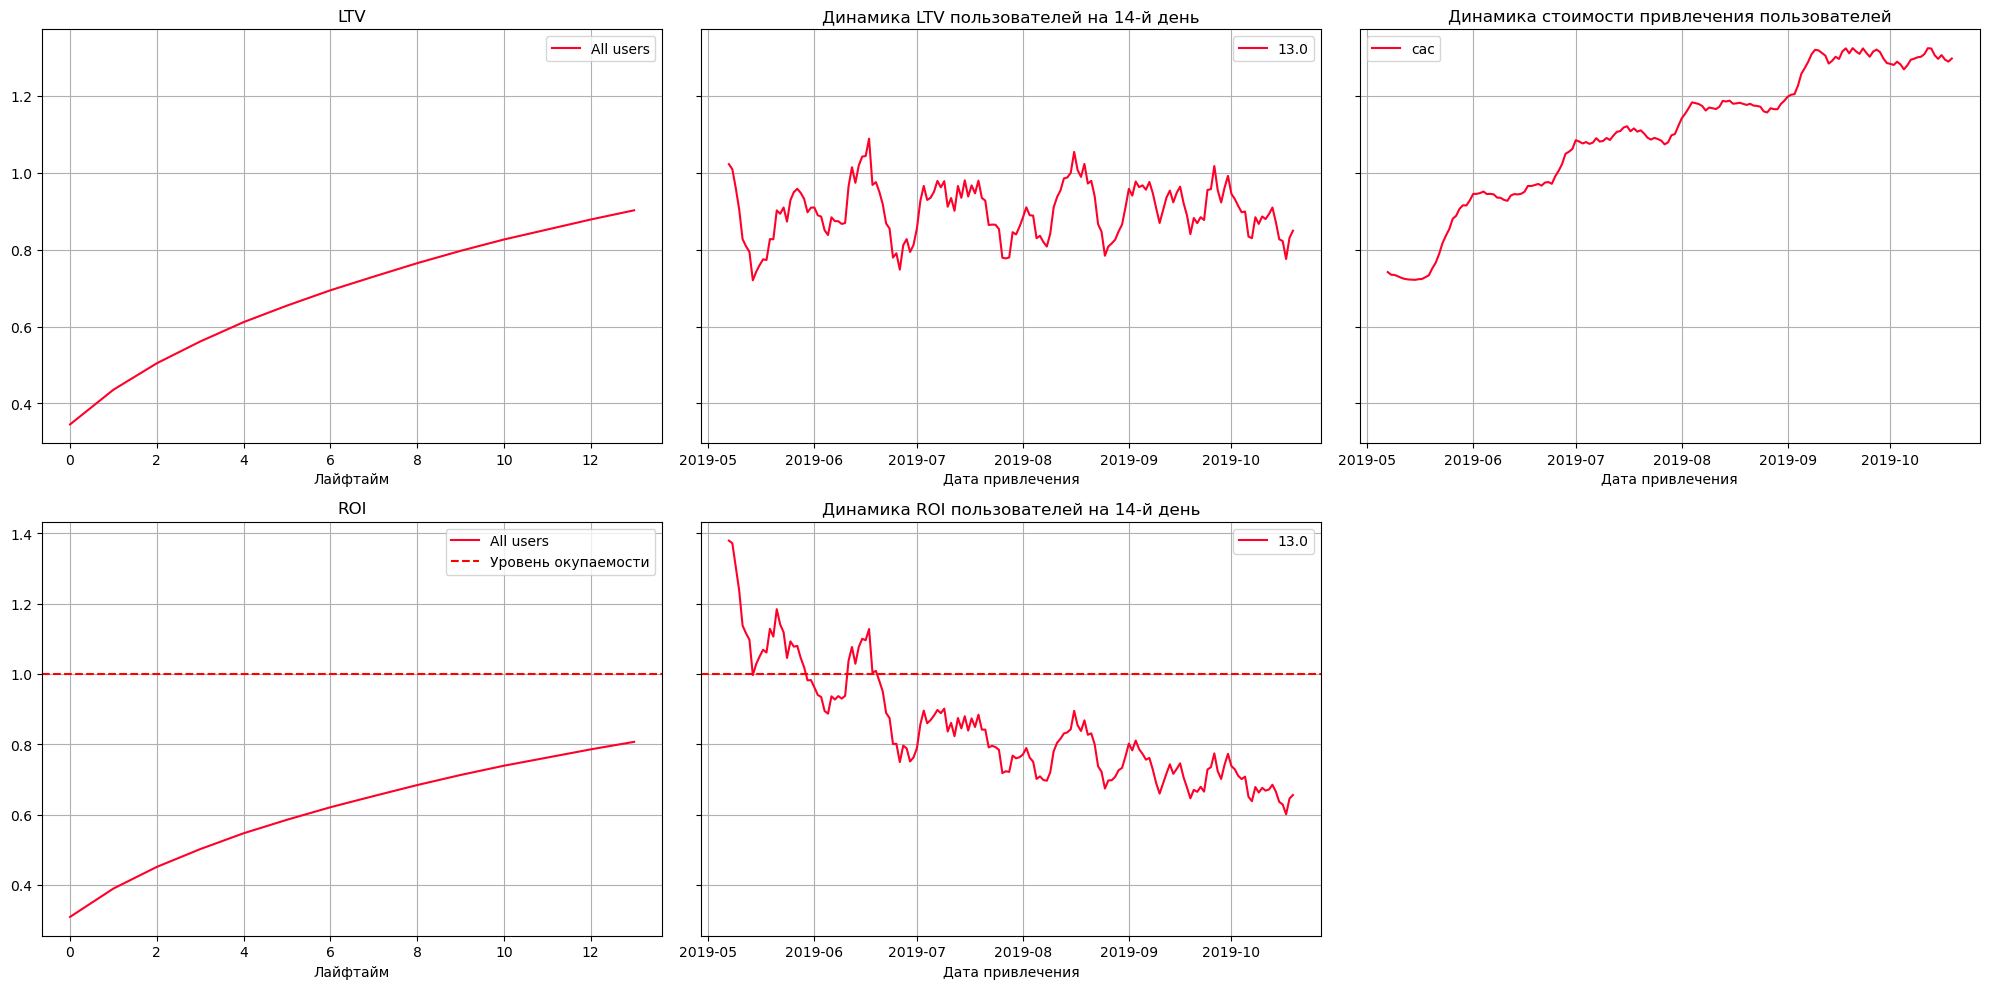

In [24]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time =  get_ltv(profiles, orders, observation_date, analysis_horizon)
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, analysis_horizon, window=7)

На графике динамики LTV пользователей на 14-й день мы видим некоторое увеличение в июне, что примерно совпадает с началом увеличения трат на рекламу на крупных рекламных каналах (что также отражено на графике динамики стоимости привлечения пользователей). При этом кривая ROI всех пользователей не достигает уровня окупаемости на 14 день, то есть график подтверждает изначальное условие: реклама приложения не окупается. На графике динамики ROI мы видим, что процесс спада начался в то же время, когда и стала резко увеличиваться стоимость привлечения пользователей.

#### Графики конверсии и удержания, динамики конверсии и удержания

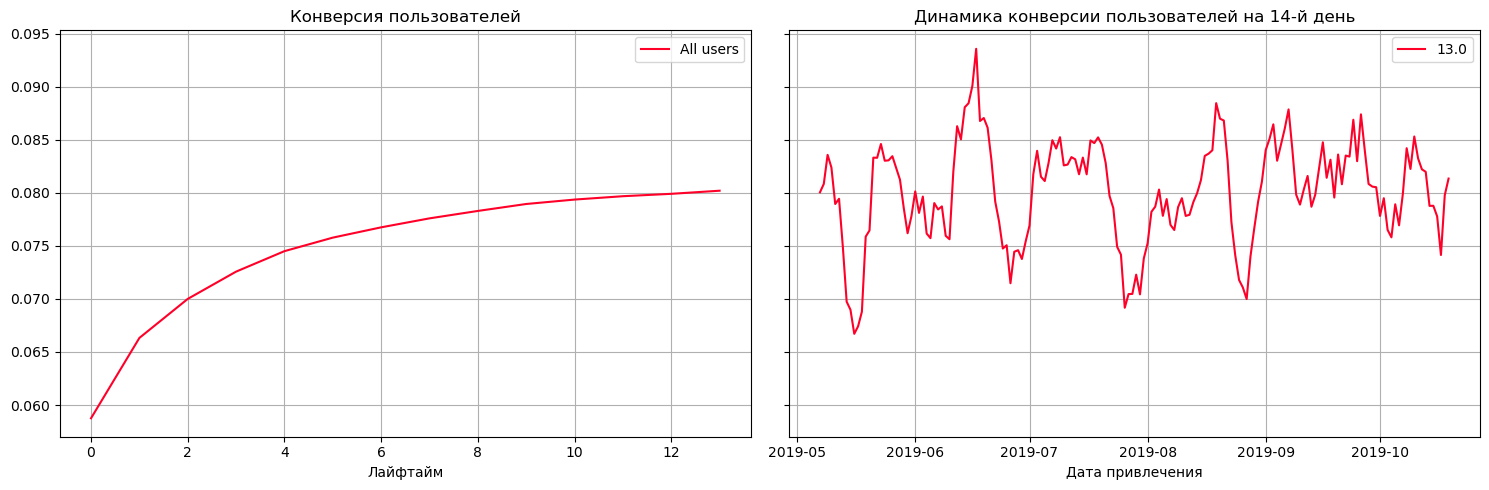

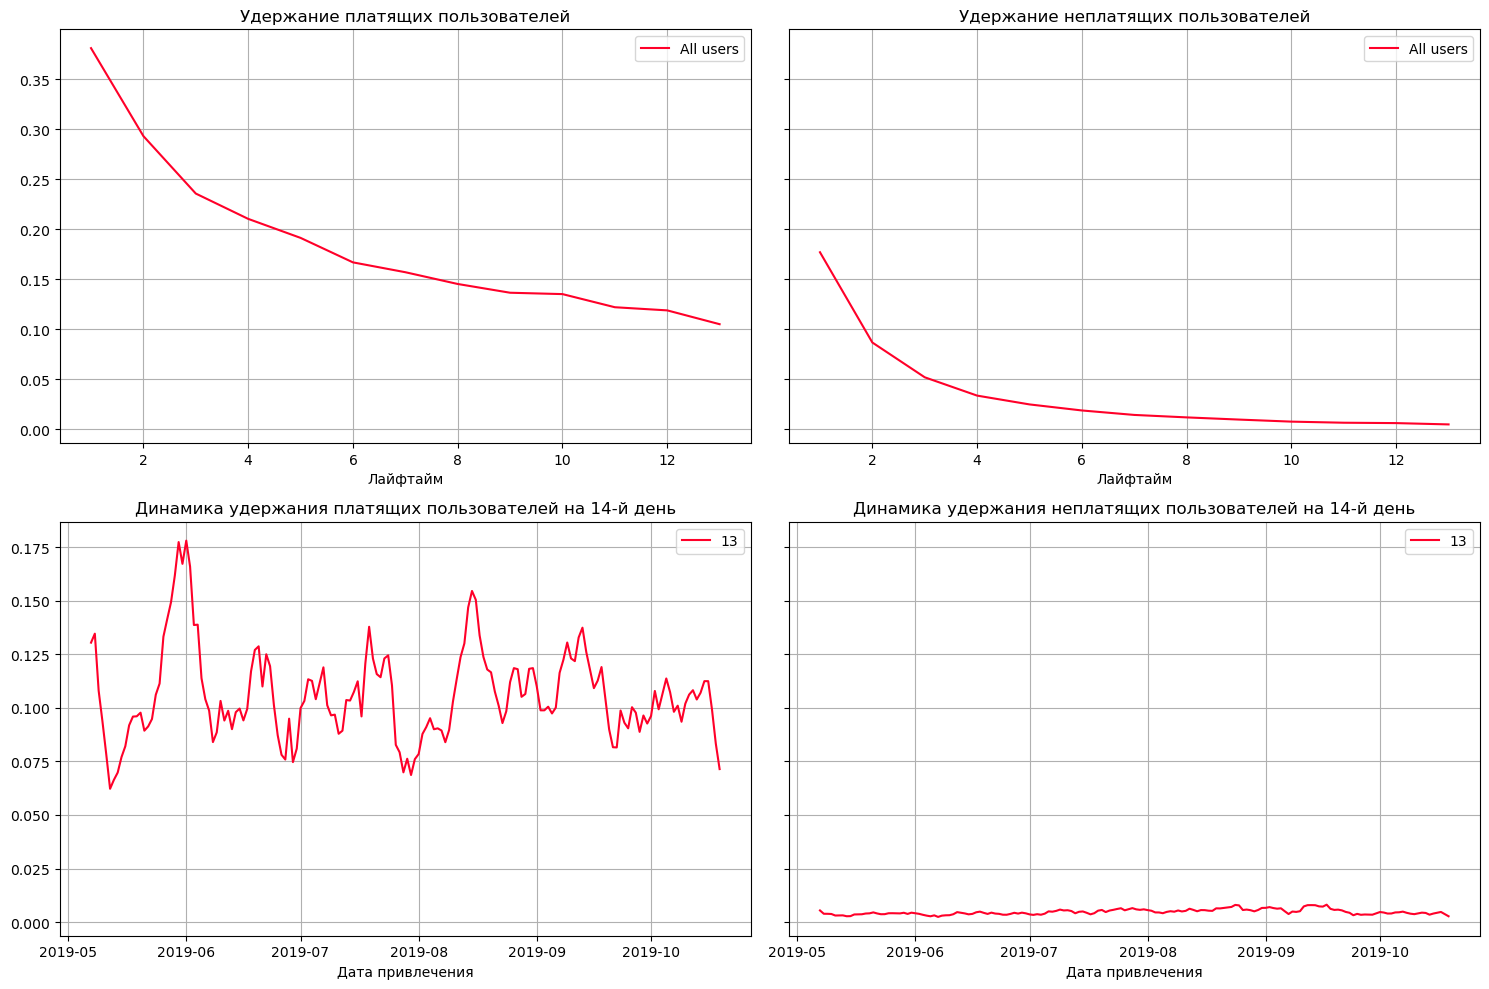

In [25]:
conversion_raw, conversion, conversion_in_time = get_conversion(profiles, orders, observation_date, analysis_horizon)
retention_raw, retention, retention_in_time = get_retention(profiles, visits, observation_date, analysis_horizon)

plot_conversion(conversion, conversion_in_time, analysis_horizon, window=7)
plot_retention(retention, retention_in_time, analysis_horizon, window=7)

График конверсии пользователей показывает резкий спад конверсии пользователей, привлеченных в середине мая, затем резкий рост с пиком в середине июня. Далее график динамики конверсии демонстирует некоторую сезонность. Что касается удержания, то лучшие показатели демонстировали пользователи, привлеченные в июне, затем наблюдается некоторый спад.

График ROI для всех пользователей показывает, что реклама не окупается полностью. У нас есть три показателя, по которым мы можем оценить окупаемость рекламы: тип устройства, страна пользователя и канал перехода. Посмотрим, какой из этих параметров сильнее всего влияет на окупаемость рекламы.

####  LTV и ROI по устройствам

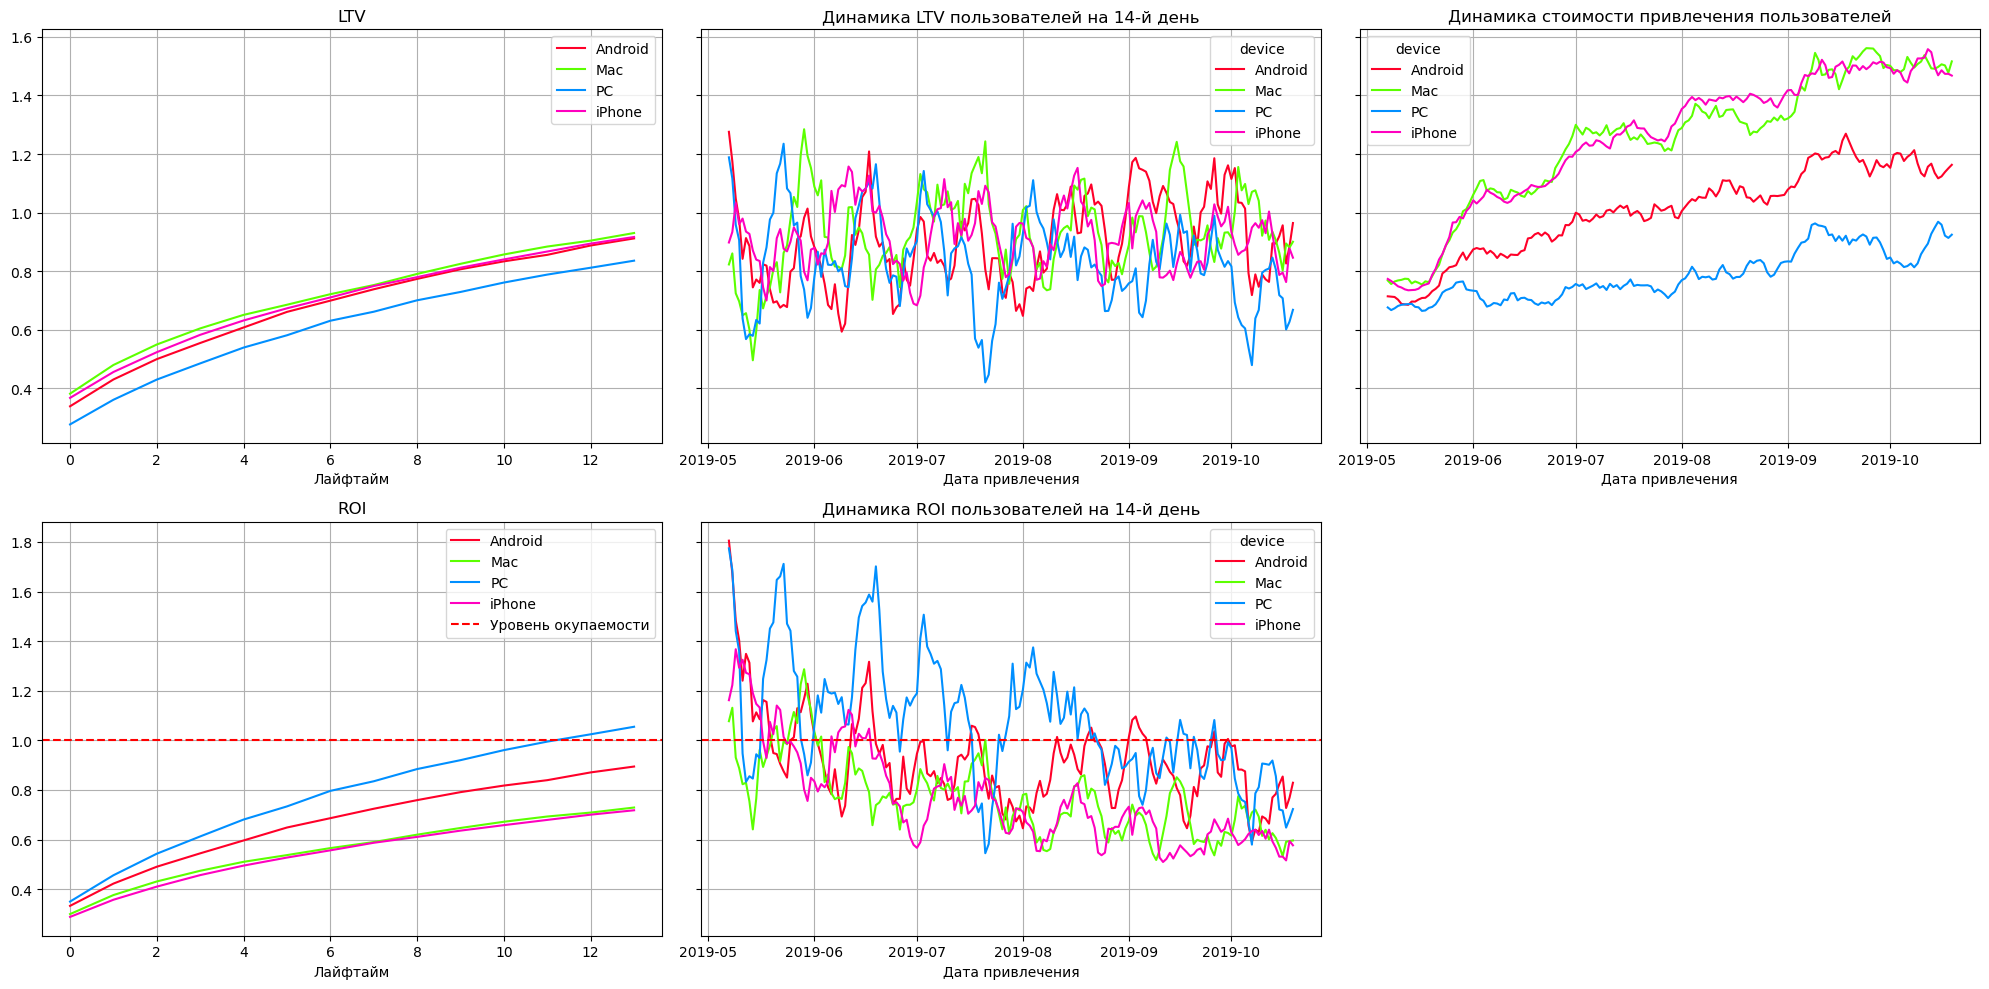

In [26]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['device'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, analysis_horizon, window=7)

Стоимость привлечения пользователей в мае увеличилась для всех устройств, для устройств Apple больше, чем для Android'ов и PC. График ROI показывает, что окупается реклама только на PC (на 11 день), но если мы посмотрим на динамику ROI, то увидим постепенное снижение на всех устройствах, причем реклама на PC практически не окупается с середины августа. Возможные причины плохой окупаемости:
- устройства Apple больше распространены в США, где задействованы наиболее подорожавшие рекламные каналы
- реклама (и, возможно, само приложение) более оптимизирована для одних устройств, чем для других

#### LTV и ROI по странам

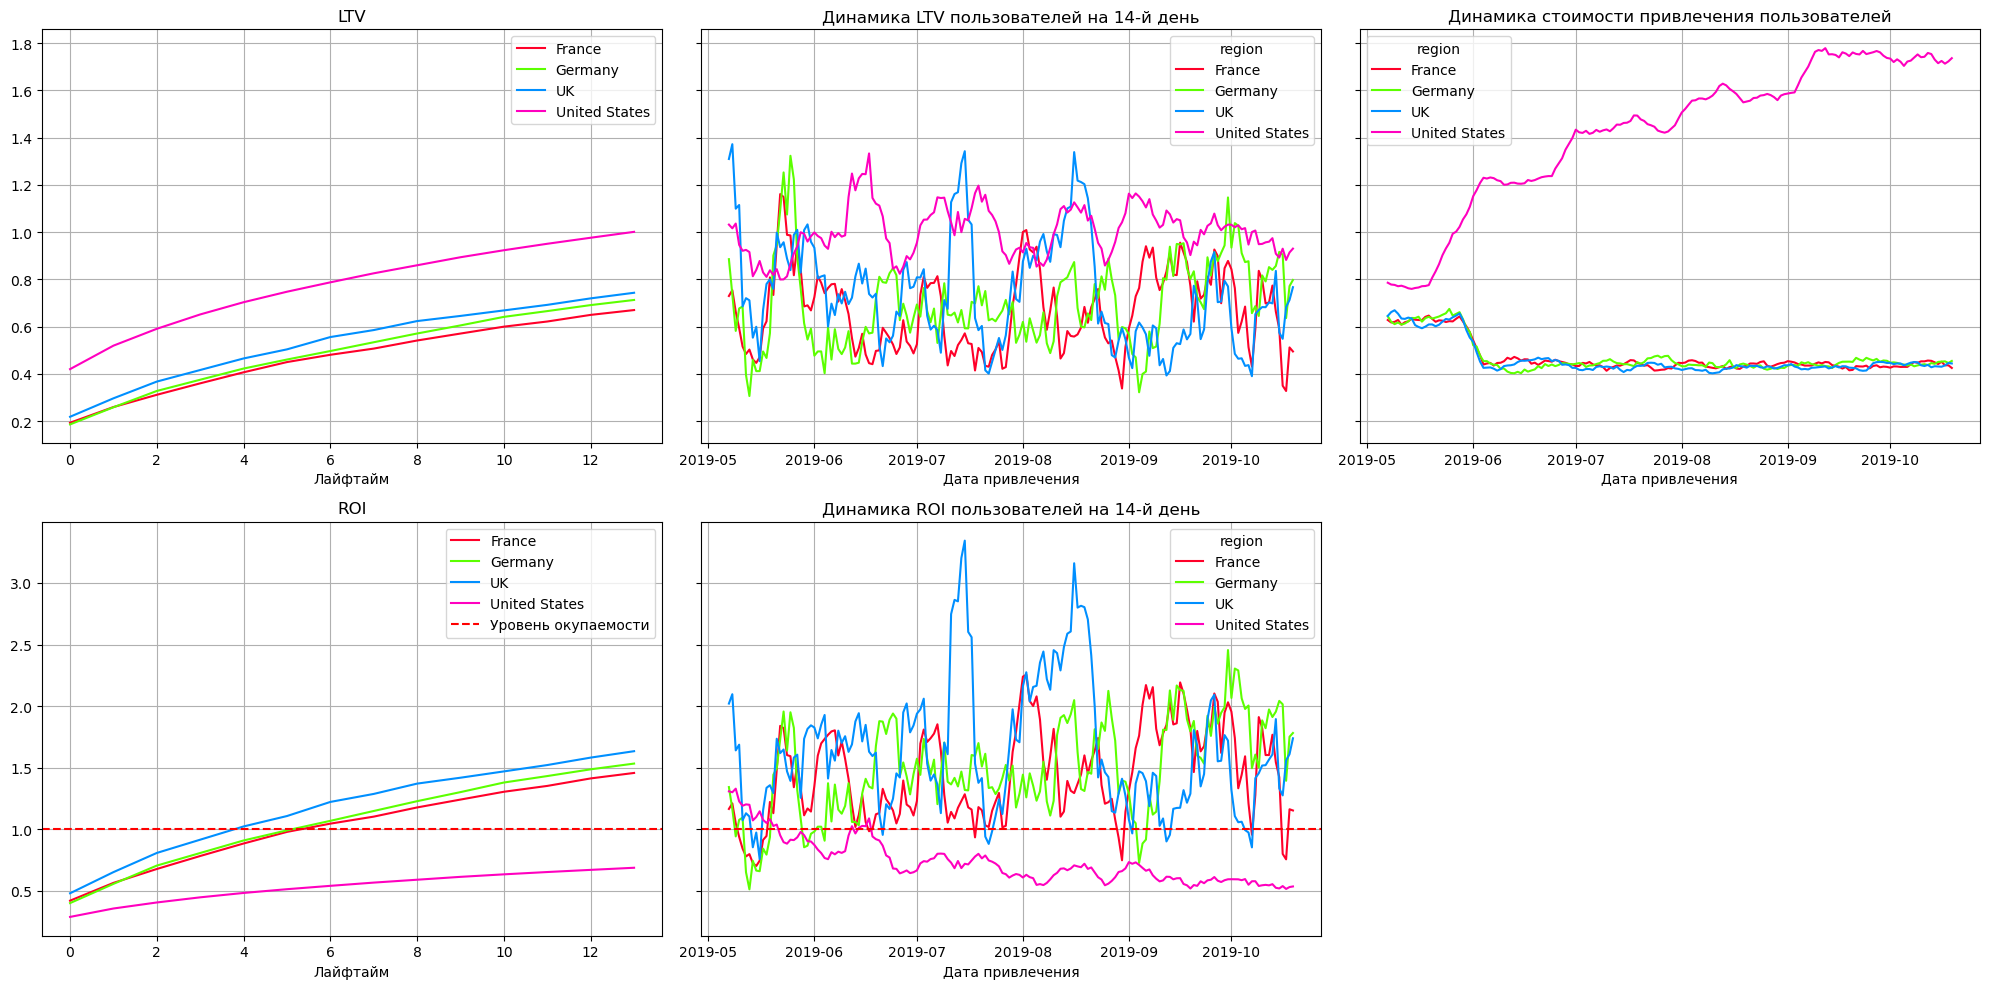

In [27]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['region'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, analysis_horizon, window=7)

Стоимость привлечения пользователей в мае резко увеличилась в США (где представлены подорожавшие каналы TipTop и FaceBoom), в европейских же странах в этот период наблюдалось снижение стоимости привлечения. Реклама в США на 14 день не окупается, тогда как в Европе реклама окупается уже в течение первой недели и редко спускается ниже уровня окупаемости. Уровень LTV в США при этом значительно выше, чем в других странах, и чуть боле стабилен, но, по всей видимости, реклама не окупается в силу ее высокой стоимости.

#### LTV и ROI по рекламным каналам

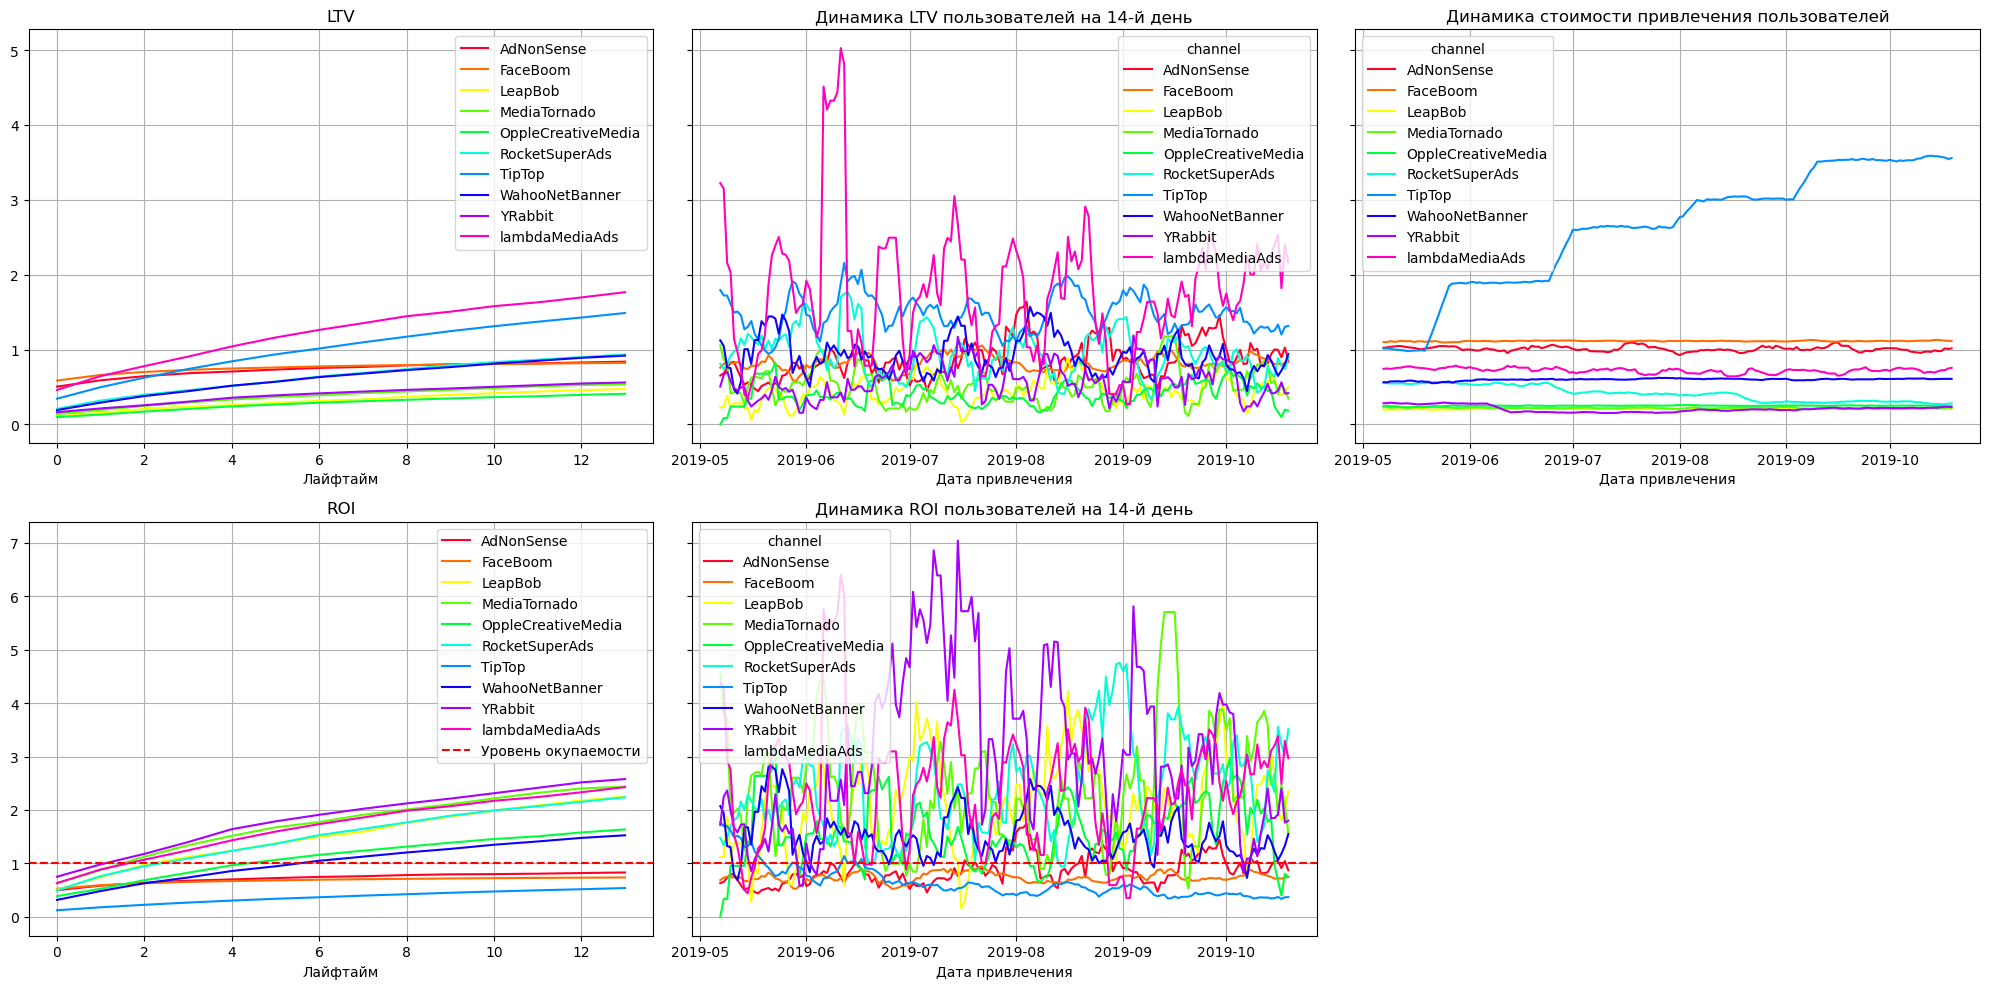

In [28]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, analysis_horizon, window=7)

Наконец, разбивка по рекламным каналам позволяет определить, что в США не окупаются затраты на каналы TipTop и FaceBoom, приносящие при этом наибольшее число пользователей. В Европе не окупается канал AdNonSense, который, хотя и приводит больше всех платящих пользователей, но не приводит их в достаточных количествах, чтобы окупить затраты. Если мы посмотрим на график динамики стоимости привлечения пользователей, то увидим, что CAC на канале TipTop растет вслед за общими расходами, а CAC на канале FaceBoom при увеличении количества расходов остается примерно на одном и том же уровне. Это может означать, что канал приводит в приложение пропорциональное количество новых пользователей, а канал TipTop нет. При этом уровень LTV канала TipTop гораздо выше, чем у FaceBoom, и постоянно растет, тогда как у FaceBoom и AdNonSense графики практически параллельны оси X, что может свидетельствовать о низком удержании пользователей.

Итого, возможные причины плохой окупаемости на каналах:
- высокая и постоянно возрастающая стоимость привлечения пользователей в случае канала TipTop
- плохое удержание пользователей в случае каналов AdNonSense и FaceBoom

Рассмотрим конверсию и удержание в разбивке по трем показателям: устройство, страна пользователя, канал привлечения.

#### Конверсия и удержание по устройствам

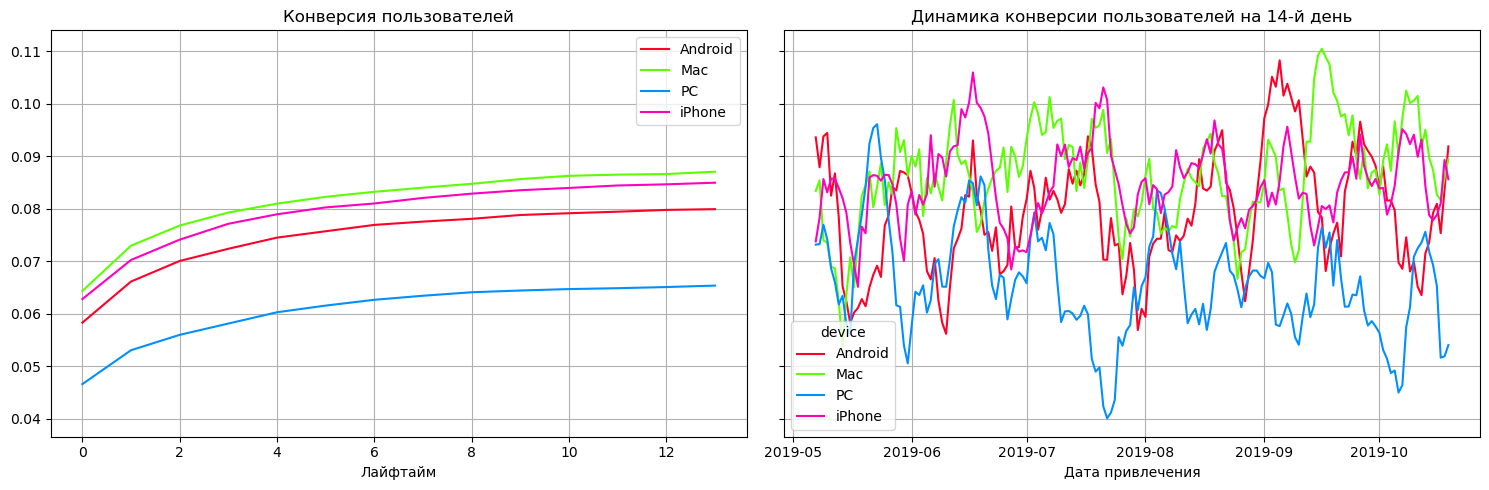

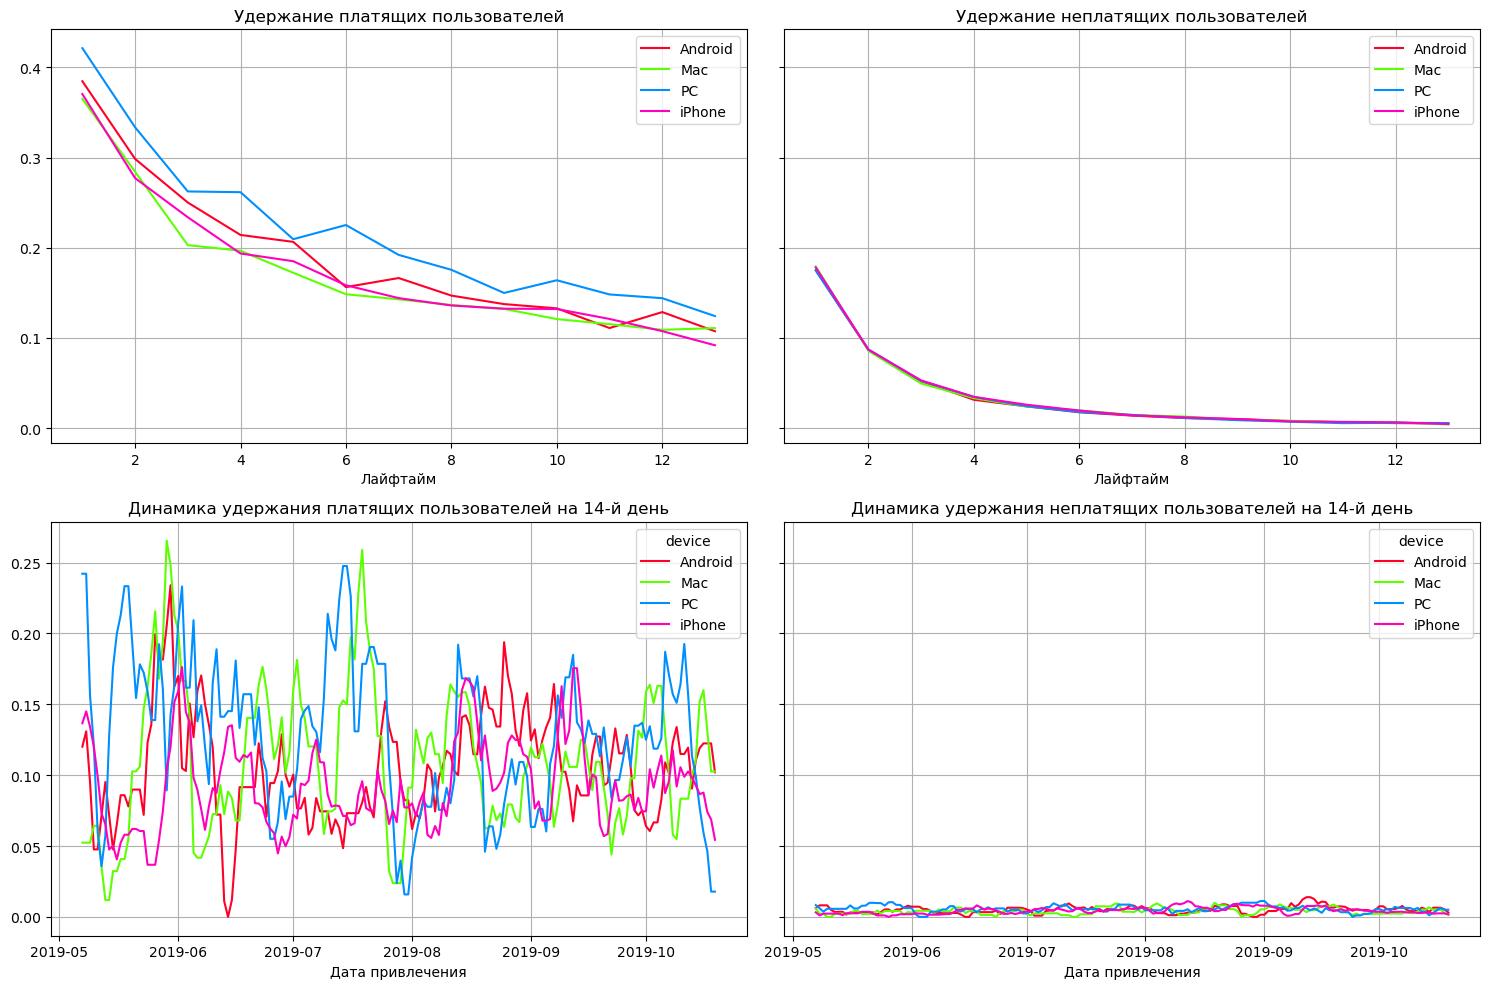

In [29]:
conversion_raw, conversion, conversion_in_time = get_conversion(profiles, orders, observation_date, analysis_horizon, dimensions=['device'])
retention_raw, retention, retention_in_time = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions=['device'])

plot_conversion(conversion, conversion_in_time, analysis_horizon, window=7)
plot_retention(retention, retention_in_time, analysis_horizon, window=7)

Первый график дублирует таблицу с долями платящих пользователей, которую мы рассматривали в разделе "Исследовательский анализ". У пользователей PC самая низкая конверсия (как и LTV), но при этом удержание у них чуть лучше, чем у пользователей других устройств. Это может быть связано как с особенностями самого приложения, так и с распространенностью устройств в различных странах.

#### Конверсия и удержание по странам

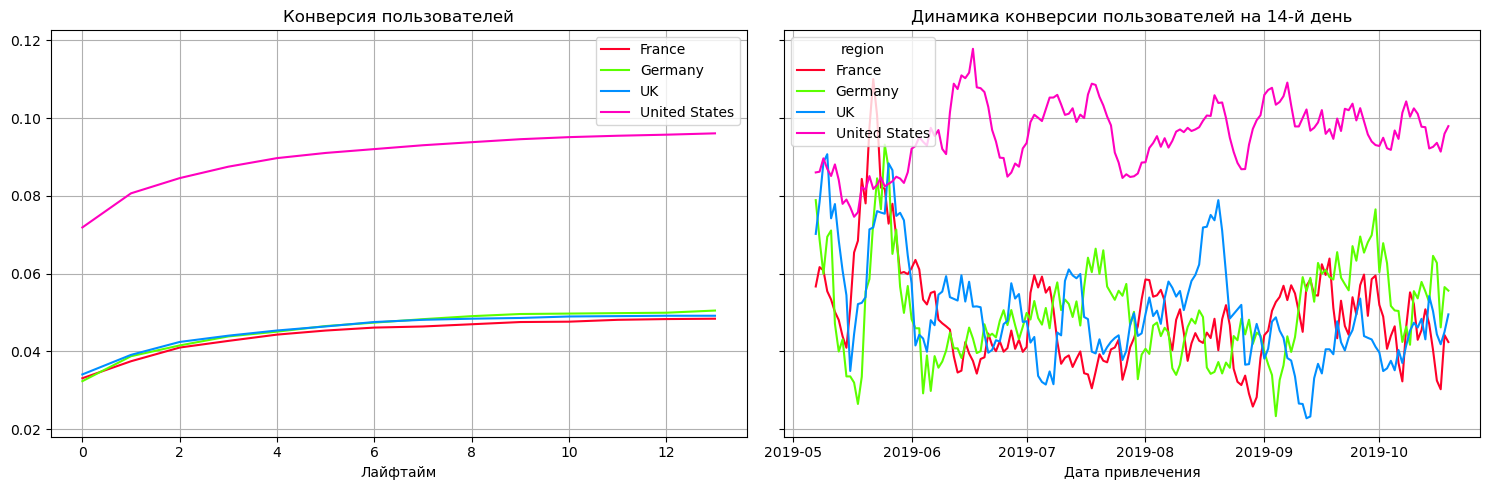

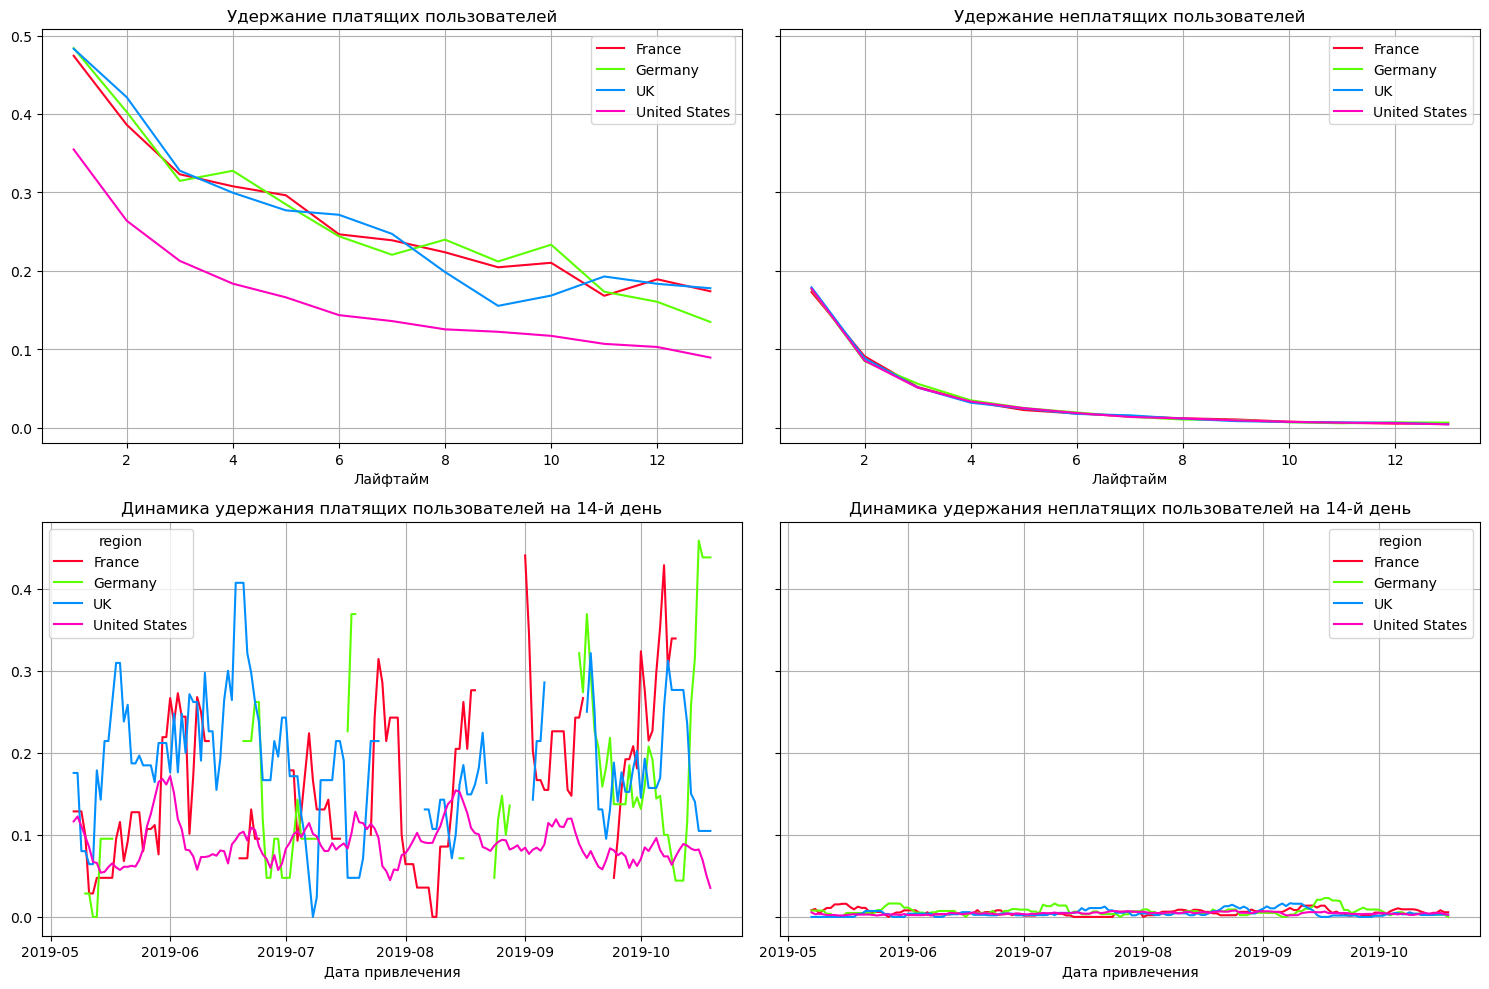

In [30]:
conversion_raw, conversion, conversion_in_time = get_conversion(profiles, orders, observation_date, analysis_horizon, dimensions=['region'])
retention_raw, retention, retention_in_time = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions=['region'])

plot_conversion(conversion, conversion_in_time, analysis_horizon, window=7)
plot_retention(retention, retention_in_time, analysis_horizon, window=7)

Конверсия пользователей из США значительно выше, чем конверсия пользователей из других стран, но при этом удержание платящих пользователей из этой страны гораздо хуже. При этом оно более стабильно, чем удержание в других странах. Поскольку большинство пользователей приложения приходят именно из этого региона, и наибольшие затраты на рекламу были произведены на каналы, работающие в США, вероятнее всего, эти особенности связаны со спецификой проведения рекламной кампании.

#### Конверсия и удержание по рекламным каналам

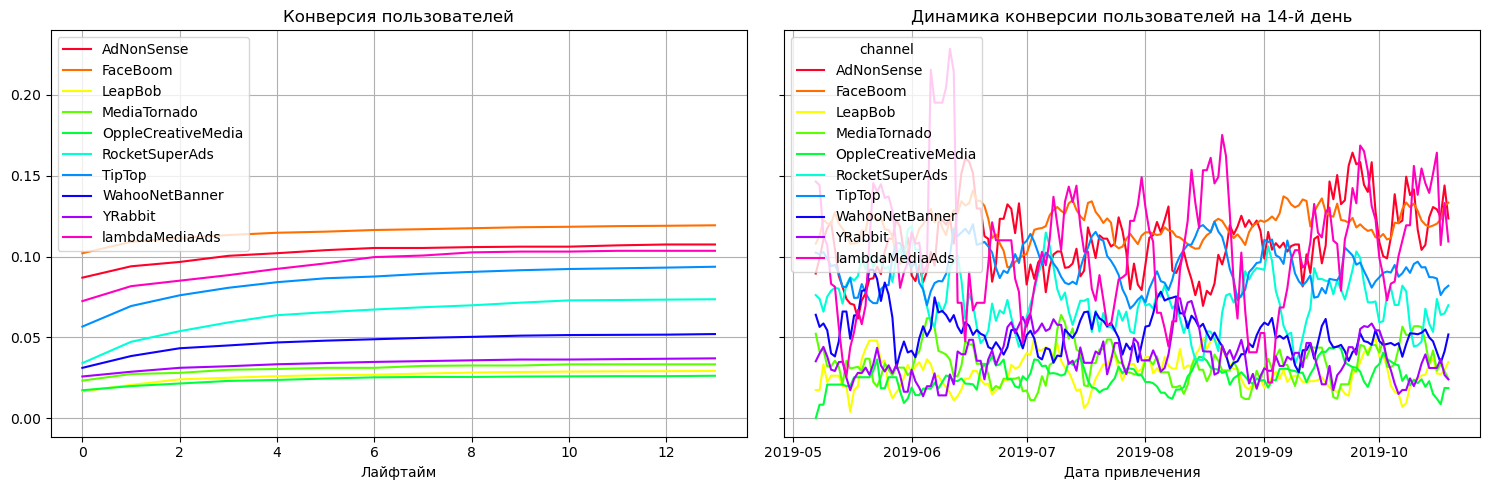

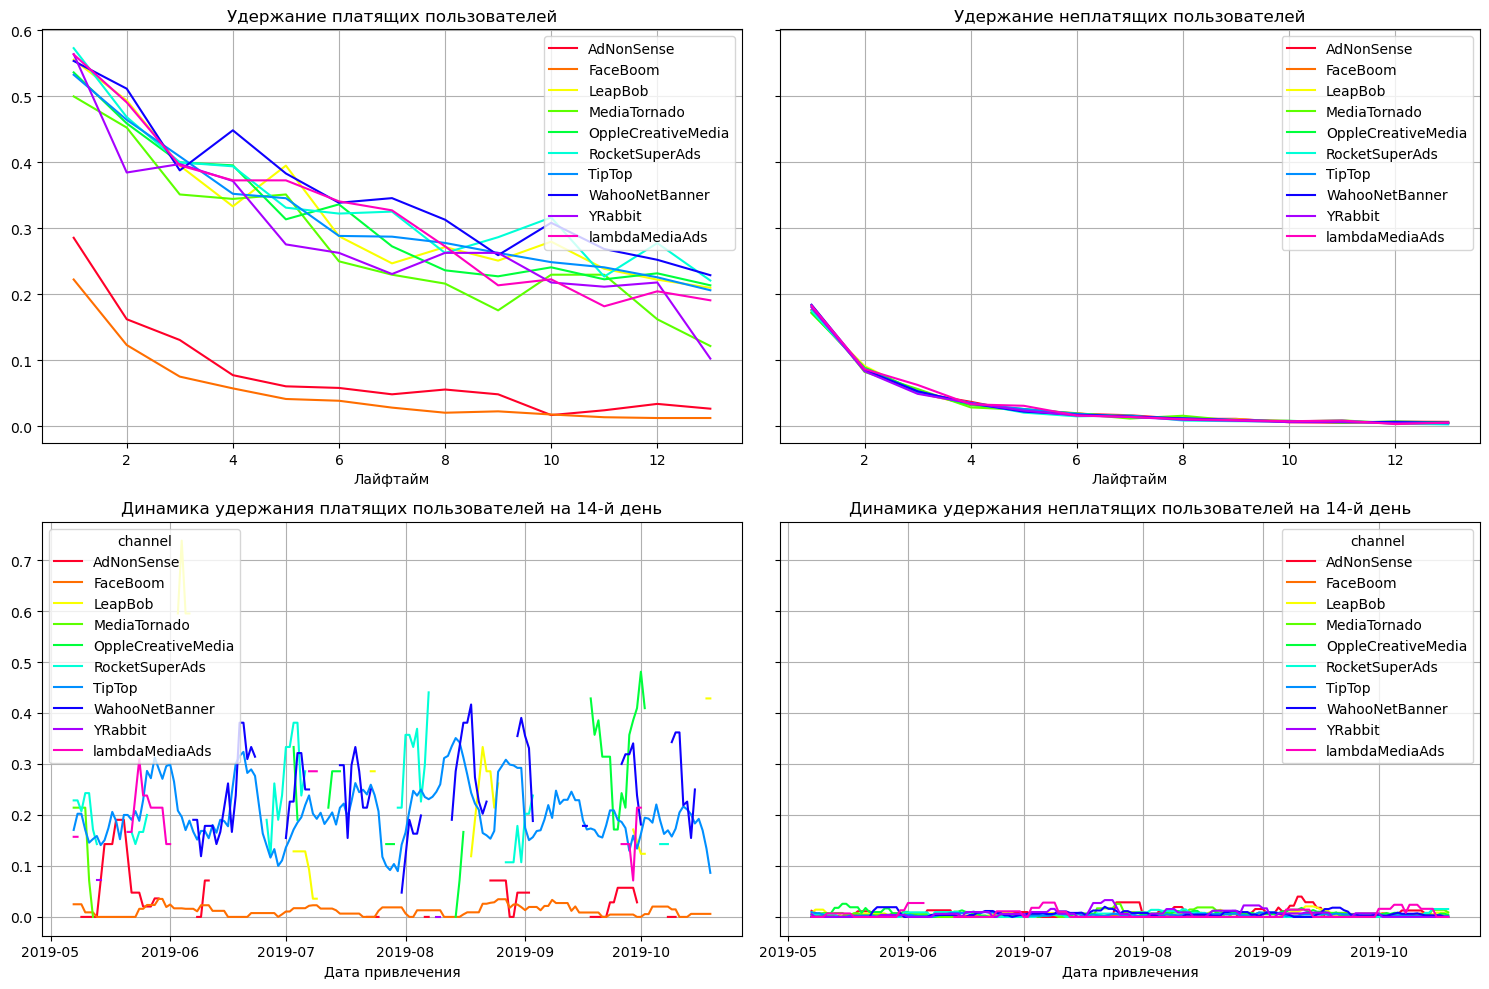

In [31]:
conversion_raw, conversion, conversion_in_time = get_conversion(profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])
retention_raw, retention, retention_in_time = get_retention(profiles, visits, observation_date, analysis_horizon, dimensions=['channel'])

plot_conversion(conversion, conversion_in_time, analysis_horizon, window=7)
plot_retention(retention, retention_in_time, analysis_horizon, window=7)

При достаточно высокой конверсии пользователей каналы FaceBoom и AdNonSense удерживают платящих пользователей примерно на том же уровне, что и не платящих (а удержание таких пользователей обычно гораздо ниже). Дорогой канал TipTop при этом демонстирует достаточно неплохой уровень удержания.

Что же не так с пользователями, приходящими с этих каналов? Так как у нас нет логов событий, исследовать мы можем только пользовательские сессии. Посчитаем количество сессий и заказов у каждого пользователя, а также их соотношение и медианную продолжительность.

In [32]:
# считаем количество сессий и медианную продолжительность сессии у каждого пользователя
number_of_sessions = visits.groupby('user_id').agg({'user_id': 'count', 'session_duration': 'median'}).rename(columns={'user_id': 'n_sessions'})

# считаем количество заказов у каждого пользователя
number_of_orders = orders.groupby('user_id').agg({'user_id': 'count'}).rename(columns={'user_id': 'n_orders'})

# добавляем данные в таблицу с профилями
new_profiles = profiles.merge(number_of_orders, on='user_id')
new_profiles = new_profiles.merge(number_of_sessions, on='user_id')

# добавляем столбец с долей сессий, в которых пользователь совершил покупку
new_profiles['paid_sessions_ratio'] = new_profiles['n_orders'] / new_profiles['n_sessions']

# грцппируем по каналам, выводим среднее количество заказов, сессий и платных сессий, сортируем по количеству сессий по убыванию
new_profiles.groupby('channel').agg({'n_orders': 'mean', 'n_sessions': 'mean', 'paid_sessions_ratio': 'mean', 'session_duration': 'median'}).sort_values(by='n_sessions', ascending=False)


n_orders  n_sessions  paid_sessions_ratio  \
channel                                                         
RocketSuperAds      6.159091   17.085227             0.380911   
WahooNetBanner      8.249448   16.273731             0.508236   
lambdaMediaAds      7.244444   14.586667             0.501292   
YRabbit             7.012121   14.018182             0.534137   
TipTop              6.935037   13.782215             0.508326   
OppleCreativeMedia  6.639485   13.373391             0.507921   
LeapBob             6.820611   13.362595             0.509400   
MediaTornado        6.846154   12.942308             0.545133   
AdNonSense          1.552273    2.654545             0.640594   
FaceBoom            1.330897    2.052010             0.733675   

                    session_duration  
channel                               
RocketSuperAds               1278.00  
WahooNetBanner               1214.00  
lambdaMediaAds               1286.00  
YRabbit                      1286.00  
TipTop                       1260.50  
OppleCreativeMedia           1175.00  
LeapBob                      1259.00  
MediaTornado                 1210.00  
AdNonSense                   1380.75  
FaceBoom                     1362.00

И действительно, количество сессий на пользователя с каналов FaceBoom и AdNonSense гораздо меньше, чем у других каналов. При хорошей конверсии необходимо постоянно тратиться на привлечение новых пользователей, что, по видимому, и приводит к тому, что реклама на этих каналах не окупается. Причина может быть следующая: сама по себе рекламная кампания может быть достаточно эффективной, так как она приводит к тому, что пользователи заходят в приложении в больших количествах (особенно это касается канала FaceBoom) и проводят в нем достаточно много времени, но реклама на этих каналах может быть слишком массированной и не попадать в целевую аудиторию приложения.

Что касается самого дорогого канала TipTop: количество повторных сессий у пользователей, привлеченных этим каналом, достаточно велико. Реклама на этом канале не окупается, вероятно, в силу дороговизны размещения рекламы.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Для анализа были представлены данные развлекательного приложения Procrastinate Pro+ (данные о посещениях сайта за период с 1 мая по 27 октября 2019 года, о совершенных покупках и о рекламных расходах). Необходимо было выявить причины убытков, которые компания терпит несмотря на большие вложения в рекламу.

В ходе исследования были изучены следующие метрики с разбивкой по устройствам, странам пользователей и каналам привлечения:
- пожизненная ценность пользователей (LTV)
- стоимость привлечения пользователей (CAC)
- окупаемость инвестиций (ROI)
- конверсия (Conversion Rate)
- коэффициент удержания (Retention Rate)

Выделены следующие вероятные причины неэффективности привлечения пользователей:
- неоправданно высокие расходы на рекламу в США через канал TipTop
- неэффективно выстроенная рекламная кампания в США через канал FaceBoom и в Европе через канал AdNonSense

Рекомендации для отдела маркетинга:
- пересмотреть стратегию ведения рекламной кампании через каналы FaceBoom и AdNonSense с целью увеличения коэффициента удержания пользователей (возможно, требуется более таргетированная реклама)
- пересмотреть финансовую стратегию размещения рекламы через канал TipTop с целью уменьшения общих расходов